# Imports

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt

Adjusting periods

In [2]:
actual_date = dt.date.today()

last_250_period = actual_date - dt.timedelta(days=250)

Get Data

In [3]:
cimsa_df = yf.download('CIMSA.IS', start=last_250_period, end=actual_date, interval="1d")

[*********************100%%**********************]  1 of 1 completed


In [4]:
cimsa_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-23,18.028570,18.857141,17.714285,17.842857,17.842857,20416452
2023-06-26,17.985714,18.771427,17.957142,18.614285,18.614285,14420917
2023-06-27,18.542856,18.885714,18.114285,18.857141,18.857141,7149219
2023-07-03,19.000000,19.814285,19.000000,19.700001,19.700001,21803831
2023-07-04,19.857141,19.914286,19.157143,19.228571,19.228571,16137450
...,...,...,...,...,...,...
2024-02-21,38.119999,38.160000,37.060001,37.320000,37.320000,14207899
2024-02-22,37.360001,38.180000,37.200001,38.080002,38.080002,16045174
2024-02-23,38.119999,38.700001,37.619999,37.900002,37.900002,18648530


Defining Exponential Moving Averages

In [5]:
cimsa_df['ema_9'] = cimsa_df['Close'].ewm(span=9, adjust=False).mean()
cimsa_df['ema_21'] = cimsa_df['Close'].ewm(span=21, adjust=False).mean()
cimsa_df['ema_55'] = cimsa_df['Close'].ewm(span=55, adjust=False).mean()
cimsa_df['ema_100'] = cimsa_df['Close'].ewm(span=100, adjust=False).mean()
cimsa_df['ema_200'] = cimsa_df['Close'].ewm(span=200, adjust=False).mean()

In [6]:
cimsa_df

,Open,High,Low,Close,Adj Close,Volume,ema_9,ema_21,ema_55,ema_100,ema_200
Date,,,,,,,,,,,
2023-06-23,18.028570,18.857141,17.714285,17.842857,17.842857,20416452,17.842857,17.842857,17.842857,17.842857,17.842857
2023-06-26,17.985714,18.771427,17.957142,18.614285,18.614285,14420917,17.997143,17.912987,17.870408,17.858133,17.850533
2023-06-27,18.542856,18.885714,18.114285,18.857141,18.857141,7149219,18.169143,17.998819,17.905649,17.877915,17.860549
2023-07-03,19.000000,19.814285,19.000000,19.700001,19.700001,21803831,18.475314,18.153472,17.969733,17.913996,17.878852
2023-07-04,19.857141,19.914286,19.157143,19.228571,19.228571,16137450,18.625966,18.251208,18.014691,17.940028,17.892282
...,...,...,...,...,...,...,...,...,...,...,...
2024-02-21,38.119999,38.160000,37.060001,37.320000,37.320000,14207899,37.234367,35.767559,33.720955,32.592523,29.801661
2024-02-22,37.360001,38.180000,37.200001,38.080002,38.080002,16045174,37.403494,35.977781,33.876635,32.701185,29.884032
2024-02-23,38.119999,38.700001,37.619999,37.900002,37.900002,18648530,37.502796,36.152528,34.020326,32.804132,29.963793


Define Short Term Strategy

In [7]:
cimsa_df['Signal'] = 0
cimsa_df['Signal'] = np.where(cimsa_df['ema_21']  > cimsa_df['ema_55'], 1.0,0.0)

cimsa_df['Position'] = cimsa_df['Signal'].diff()

cimsa_df.head()

,Open,High,Low,Close,Adj Close,Volume,ema_9,ema_21,ema_55,ema_100,ema_200,Signal,Position
Date,,,,,,,,,,,,,
2023-06-23,18.028570,18.857141,17.714285,17.842857,17.842857,20416452,17.842857,17.842857,17.842857,17.842857,17.842857,0.0,NaN
2023-06-26,17.985714,18.771427,17.957142,18.614285,18.614285,14420917,17.997143,17.912987,17.870408,17.858133,17.850533,1.0,1.0
2023-06-27,18.542856,18.885714,18.114285,18.857141,18.857141,7149219,18.169143,17.998819,17.905649,17.877915,17.860549,1.0,0.0
2023-07-03,19.000000,19.814285,19.000000,19.700001,19.700001,21803831,18.475314,18.153472,17.969733,17.913996,17.878852,1.0,0.0
2023-07-04,19.857141,19.914286,19.157143,19.228571,19.228571,16137450,18.625966,18.251208,18.014691,17.940028,17.892282,1.0,0.0


Plot Function

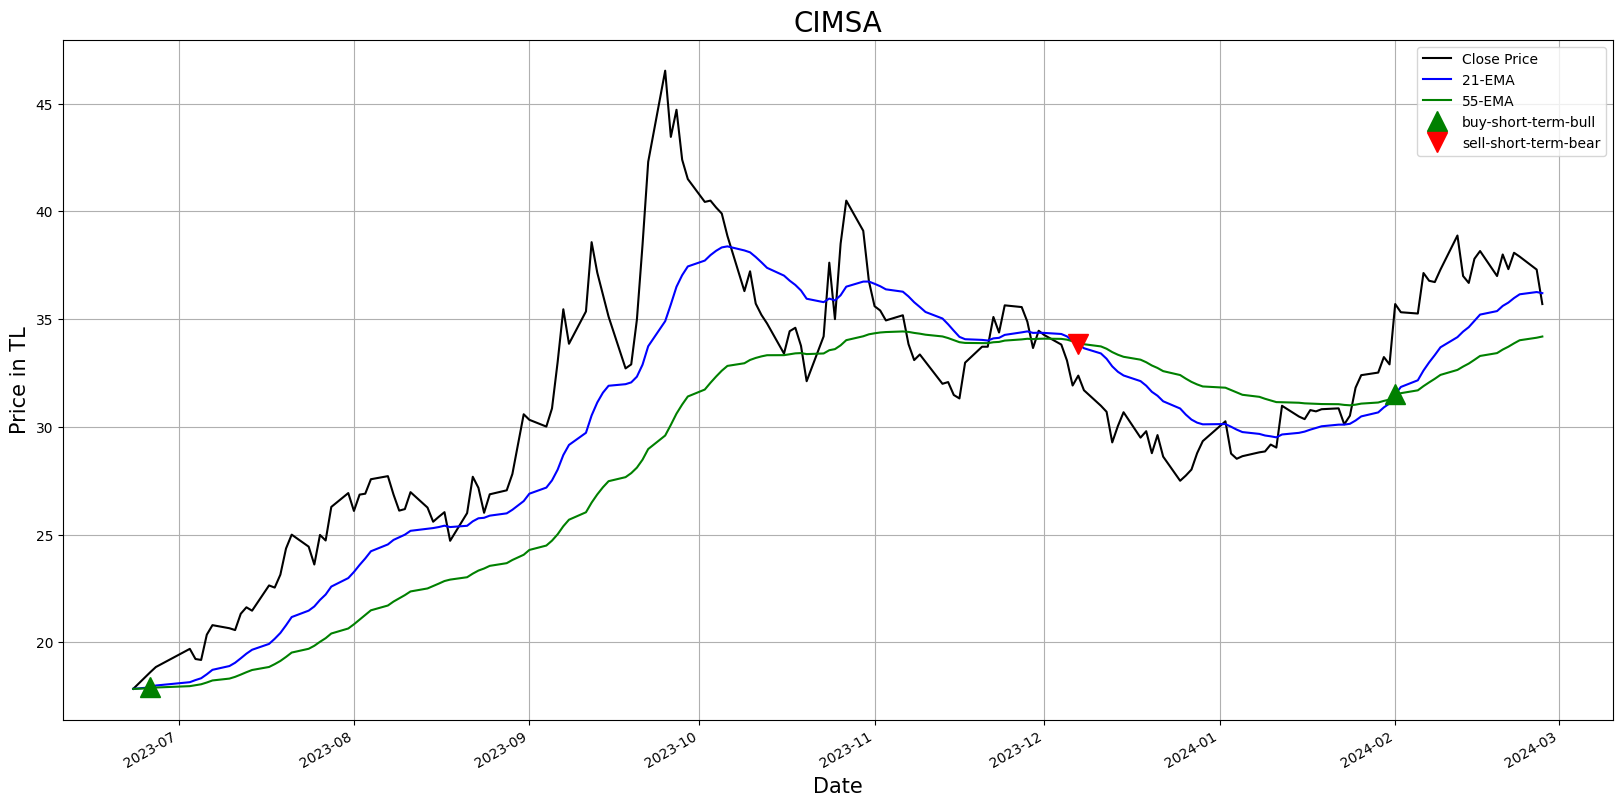

In [8]:
plt.figure(figsize= (20,10))

cimsa_df['Close'].plot(color= 'k', label='Close Price')
cimsa_df['ema_21'].plot(color= 'b', label = '21-EMA')
cimsa_df['ema_55'].plot(color = 'g', label= '55-EMA')

plt.plot(cimsa_df[cimsa_df['Position'] == 1].index,
         cimsa_df['ema_21'][cimsa_df['Position'] == 1],
          '^', markersize=15, color='g', label='buy-short-term-bull')

plt.plot(cimsa_df[cimsa_df['Position'] == -1].index,
         cimsa_df['ema_21'][cimsa_df['Position'] == -1],
          'v', markersize=15, color='r', label='sell-short-term-bear')

plt.ylabel('Price in TL', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.title('CIMSA', fontsize=20)
plt.legend()
plt.grid()
plt.show()

Long Term Strategy

In [9]:
cimsa_df['Signal-LongTerm'] = 0
cimsa_df['Signal-LongTerm'] = np.where(cimsa_df['ema_55']  > cimsa_df['ema_200'], 1.0,0.0)

cimsa_df['Position-LongTerm'] = cimsa_df['Signal-LongTerm'].diff()

cimsa_df.head()

,Open,High,Low,Close,Adj Close,Volume,ema_9,ema_21,ema_55,ema_100,ema_200,Signal,Position,Signal-LongTerm,Position-LongTerm
Date,,,,,,,,,,,,,,,
2023-06-23,18.028570,18.857141,17.714285,17.842857,17.842857,20416452,17.842857,17.842857,17.842857,17.842857,17.842857,0.0,NaN,0.0,NaN
2023-06-26,17.985714,18.771427,17.957142,18.614285,18.614285,14420917,17.997143,17.912987,17.870408,17.858133,17.850533,1.0,1.0,1.0,1.0
2023-06-27,18.542856,18.885714,18.114285,18.857141,18.857141,7149219,18.169143,17.998819,17.905649,17.877915,17.860549,1.0,0.0,1.0,0.0
2023-07-03,19.000000,19.814285,19.000000,19.700001,19.700001,21803831,18.475314,18.153472,17.969733,17.913996,17.878852,1.0,0.0,1.0,0.0
2023-07-04,19.857141,19.914286,19.157143,19.228571,19.228571,16137450,18.625966,18.251208,18.014691,17.940028,17.892282,1.0,0.0,1.0,0.0


Plot both strategy in same graph

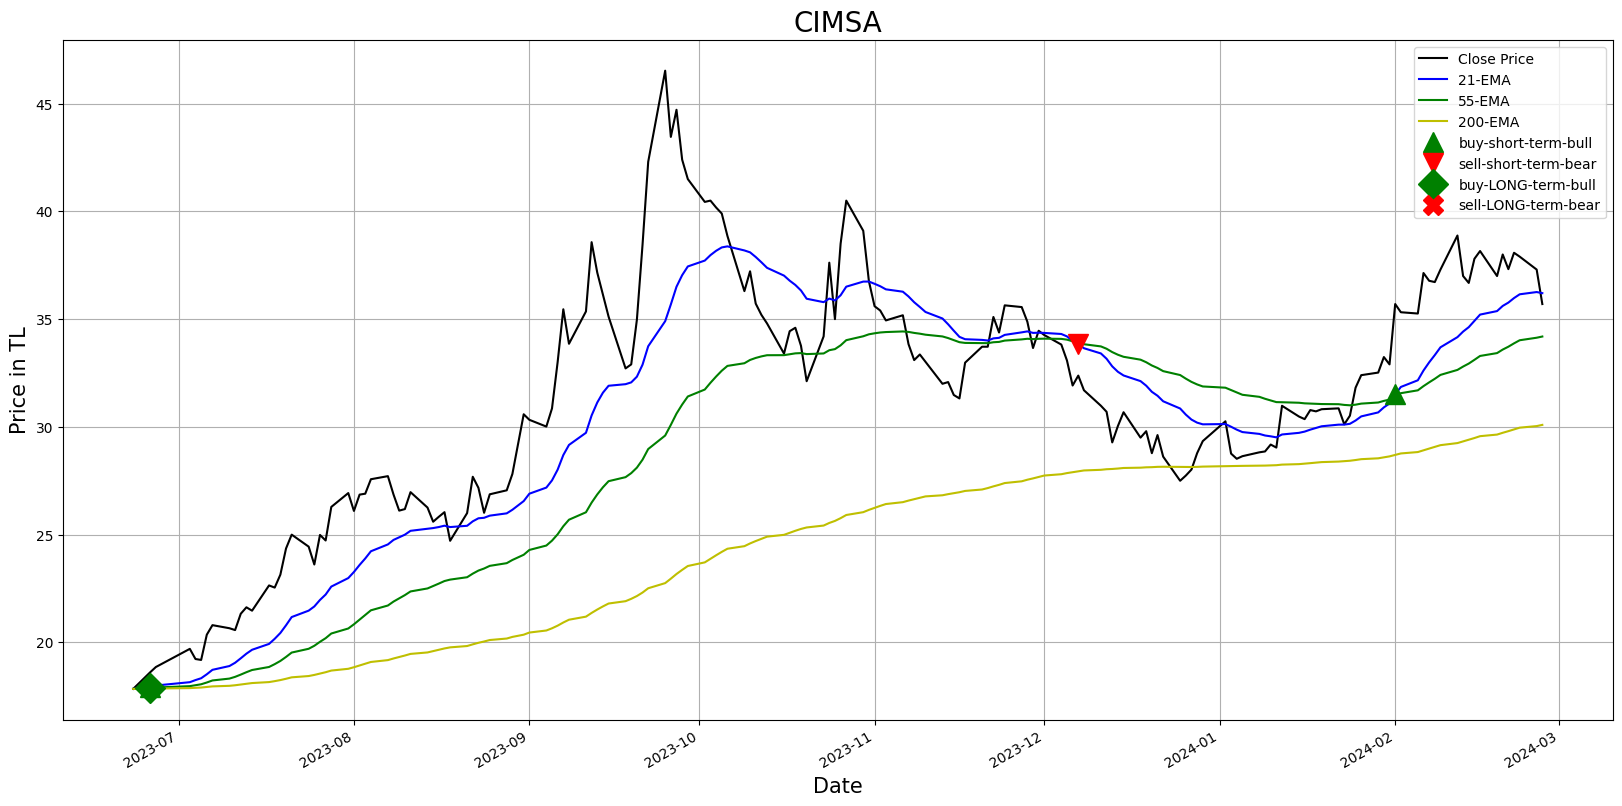

In [10]:
plt.figure(figsize= (20,10))

cimsa_df['Close'].plot(color= 'k', label='Close Price')
cimsa_df['ema_21'].plot(color= 'b', label = '21-EMA')
cimsa_df['ema_55'].plot(color = 'g', label= '55-EMA')
cimsa_df['ema_200'].plot(color= 'y', label='200-EMA')

plt.plot(cimsa_df[cimsa_df['Position'] == 1].index,
         cimsa_df['ema_21'][cimsa_df['Position'] == 1],
          '^', markersize=15, color='g', label='buy-short-term-bull')

plt.plot(cimsa_df[cimsa_df['Position'] == -1].index,
         cimsa_df['ema_21'][cimsa_df['Position'] == -1],
          'v', markersize=15, color='r', label='sell-short-term-bear')

plt.plot(cimsa_df[cimsa_df['Position-LongTerm'] == 1].index,
         cimsa_df['ema_55'][cimsa_df['Position-LongTerm'] == 1],
          'D', markersize=15, color='g', label='buy-LONG-term-bull')

plt.plot(cimsa_df[cimsa_df['Position-LongTerm'] == -1].index,
         cimsa_df['ema_55'][cimsa_df['Position-LongTerm'] == -1],
          'X', markersize=15, color='r', label='sell-LONG-term-bear')

plt.ylabel('Price in TL', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.title('CIMSA', fontsize=20)
plt.legend()
plt.grid()
plt.show()

Let's put everything in a function to check more easy in future

In [19]:
def ema_strategy(ticker, period='1d'):
    actual_date = dt.date.today()
    last_250_period = actual_date - dt.timedelta(days=250)

    stock_df = yf.download(ticker, start=last_250_period, end=actual_date, interval=period)

    stock_df['ema_9'] = stock_df['Close'].ewm(span=9, adjust=False).mean()
    stock_df['ema_21'] = stock_df['Close'].ewm(span=21, adjust=False).mean()
    stock_df['ema_55'] = stock_df['Close'].ewm(span=55, adjust=False).mean()
    stock_df['ema_100'] = stock_df['Close'].ewm(span=100, adjust=False).mean()
    stock_df['ema_200'] = stock_df['Close'].ewm(span=200, adjust=False).mean()

    stock_df['Signal'] = np.where(stock_df['ema_21'] > stock_df['ema_55'], 1.0, 0.0)
    stock_df['Position'] = stock_df['Signal'].diff()

    stock_df['Signal-LongTerm'] = np.where(stock_df['ema_55'] > stock_df['ema_200'], 1.0, 0.0)
    stock_df['Position-LongTerm'] = stock_df['Signal-LongTerm'].diff()

    plt.figure(figsize=(20, 10))

    stock_df['Close'].plot(color= 'k', label='Close Price')
    stock_df['ema_9'].plot(color= 'orange', label = '9-EMA')
    stock_df['ema_21'].plot(color= 'b', label = '21-EMA')
    stock_df['ema_55'].plot(color = 'g', label= '55-EMA')
    stock_df['ema_100'].plot(color= 'y', label = '100-EMA')
    stock_df['ema_200'].plot(color= 'm', label='200-EMA')

    plt.plot(stock_df[stock_df['Position'] == 1].index,
            stock_df['ema_21'][stock_df['Position'] == 1],
            '^', markersize=15, color='g', label='buy-short-term-bull')

    plt.plot(stock_df[stock_df['Position'] == -1].index,
            stock_df['ema_21'][stock_df['Position'] == -1],
            'v', markersize=15, color='r', label='sell-short-term-bear')

    plt.plot(stock_df[stock_df['Position-LongTerm'] == 1].index,
            stock_df['ema_55'][stock_df['Position-LongTerm'] == 1],
            'D', markersize=15, color='g', label='buy-LONG-term-bull')

    plt.plot(stock_df[stock_df['Position-LongTerm'] == -1].index,
            stock_df['ema_55'][stock_df['Position-LongTerm'] == -1],
            'X', markersize=15, color='r', label='sell-LONG-term-bear')

    plt.ylabel('Price in TL', fontsize=15)
    plt.xlabel('Date', fontsize=15)
    plt.title(f'{ticker} - {period}', fontsize=20)
    plt.legend()
    plt.grid()
    
    # Save the plot as an image
    plt.savefig(f'{ticker}_{period}_plot.jpg')
    
    # Show the plot
    plt.show()

[*********************100%%**********************]  1 of 1 completed

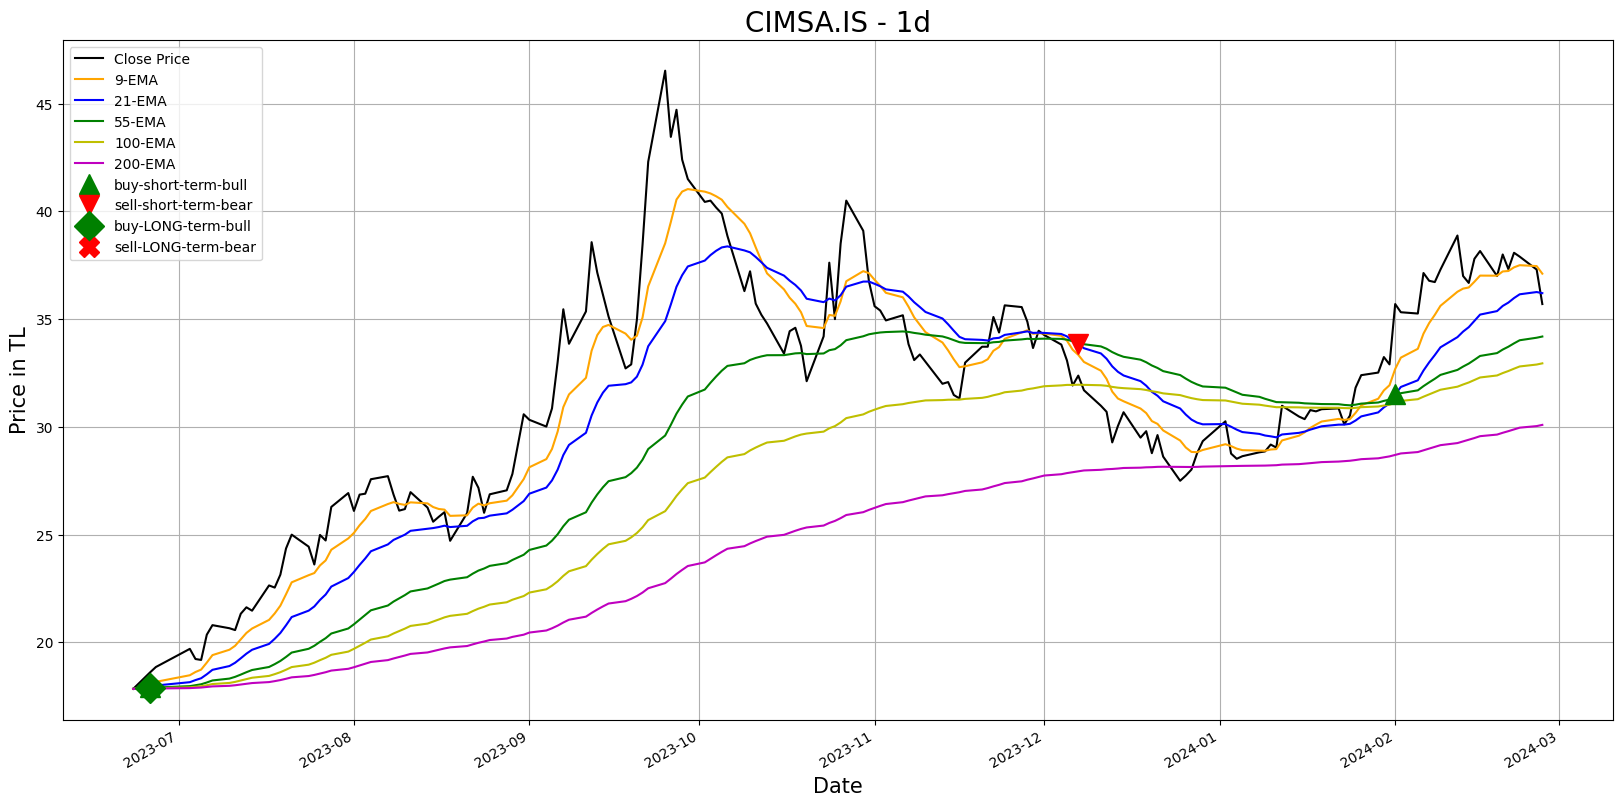

In [20]:
ema_strategy('CIMSA.IS')